In [1]:
import wikipedia
import networkx as nx
from tqdm import tqdm



BLACK_LIST = [
    '江戸時代',
    '幕末の人物一覧',    
    '明治の人物一覧',
    '安土桃山時代の人物一覧',
    '江戸時代の人物',
    '歴史上の人物一覧',
    '徳川将軍一覧',
    '将棋棋士',
    '浮世絵師一覧',
    '儒学者一覧',
    '江戸時代の囲碁棋士一覧'
]

wikipedia.set_lang("ja")

%matplotlib inline

In [2]:
people_list_page = wikipedia.page("江戸時代の人物一覧")

In [3]:
G = nx.DiGraph()

for person in people_list_page.links:
    if person not in BLACK_LIST:
        G.add_node(person)

In [4]:
G.number_of_nodes()

659

In [5]:
for person_from in tqdm(G.nodes):
    try:
        person_page = wikipedia.page(person_from)
        if person_page.title == person_from:
            for person_to in person_page.links:
                if person_to in list(G.nodes):
                    G.add_edge(person_from, person_to)
    except:
        pass

non_neighbors = []
for node in G.nodes:
    if len(list(G.neighbors(node))) == 0:
        non_neighbors.append(node)

for node in non_neighbors:
    G.remove_node(node)

 23%|█████████████▋                                              | 150/659 [06:31<23:45,  2.80s/it]/Users/yamamoto/.anyenv/envs/pyenv/versions/3.11.7/lib/python3.11/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/yamamoto/.anyenv/envs/pyenv/versions/3.11.7/lib/python3.11/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
100%|████████████████████████████████████████████████████████████| 659/659 [29:06<00:00,  2.65s/it]


In [77]:
DRAW_CONFIG = {
    'node_size': 5,
    'arrowsize': 5,    
    'font_size': 4,
    'with_labels': True,
    'node_color': 'cornflowerblue',
    'alpha': 0.7,
    'edge_color': 'cornflowerblue',
    'width': 0.10,
    'font_family': 'IPAPGothic'
}


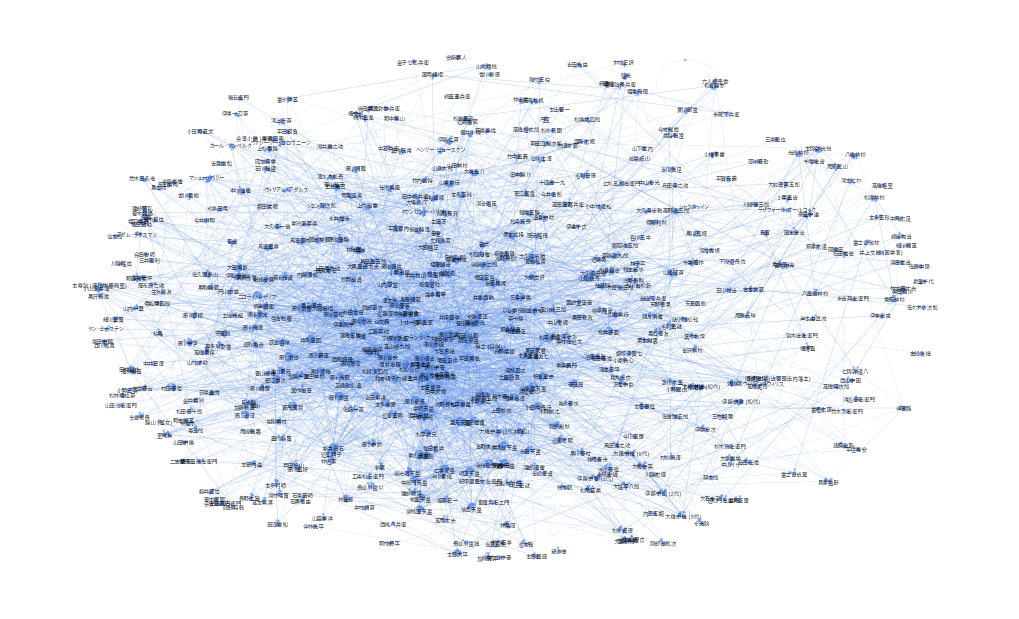

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, iterations=50, seed=1234, k=0.5)
nx.draw(G, pos, **DRAW_CONFIG)
plt.show()

In [80]:
plt.savefig('edo_people_graph.pdf')

<Figure size 640x480 with 0 Axes>

In [39]:
non_neighbors = []
for node in G.nodes:
    if len(list(G.neighbors(node))) == 0:
        non_neighbors.append(node)

non_neighbors

[]

In [38]:
for node in non_neighbors:
    G.remove_node(node)

In [90]:
delete_neighbors = []
for node in G.nodes:
    if node.endswith('藩'):
        delete_neighbors.append(node)

for node in delete_neighbors:
    G.remove_node(node)

In [96]:
nx.write_gml(G, "edo.gml")

In [99]:
G_edo = nx.read_gml("edo.gml")

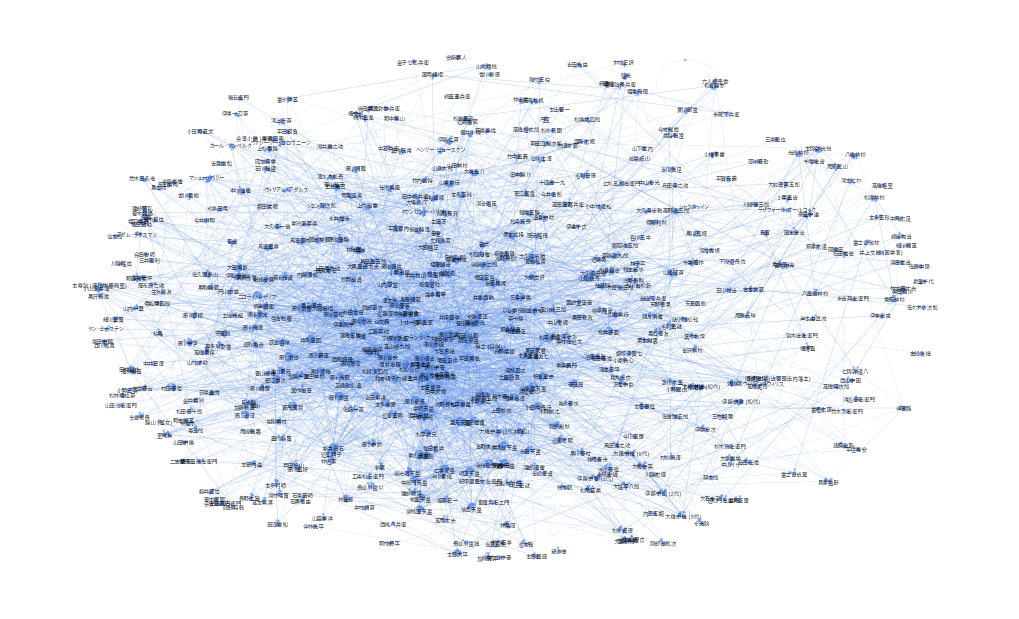

In [100]:
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G_edo, iterations=50, seed=1234, k=0.5)
nx.draw(G, pos, **DRAW_CONFIG)
plt.show()

In [102]:
sorted(nx.pagerank(G_edo).items(), key=lambda x:-x[1])[:30]

[('徳川家康', 0.018839762302814107),
 ('徳川秀忠', 0.014647218544087416),
 ('徳川家光', 0.014047416609427236),
 ('徳川家斉', 0.012598052079051706),
 ('本居宣長', 0.011830566523394653),
 ('徳川吉宗', 0.011773042353908645),
 ('徳川綱吉', 0.011379371758192062),
 ('徳川家綱', 0.011171561521555138),
 ('徳川慶喜', 0.011138666353330481),
 ('徳川家茂', 0.010507868445224694),
 ('徳川家慶', 0.009884146816649652),
 ('松平定信', 0.009392933122066285),
 ('徳川家宣', 0.008896610471324763),
 ('徳川家治', 0.008604448734614417),
 ('徳川家定', 0.008493599171781604),
 ('明治天皇', 0.007086237830509613),
 ('徳川家重', 0.007052635452644552),
 ('後水尾天皇', 0.006904194401312377),
 ('徳川家継', 0.006611535953116792),
 ('勝海舟', 0.0064994578679011105),
 ('孝明天皇', 0.0060884018726106515),
 ('新井白石', 0.005977341340214977),
 ('土井利勝', 0.0059182449246124634),
 ('井伊直弼', 0.005901239051554294),
 ('水野忠邦', 0.005813149832871907),
 ('霊元天皇', 0.005774414315342403),
 ('徳川光圀', 0.005711989954209582),
 ('徳川斉昭', 0.005482055689677943),
 ('後陽成天皇', 0.005434813926403158),
 ('堀田正俊', 0.005354027523454542)]

In [103]:
import networkx as nx
import numpy as np
from sklearn.preprocessing import normalize


def calc_pagerank(G, beta=0.85, iteration_num=50):
    n = G.number_of_nodes()

    # 隣接行列
    A = nx.adjacency_matrix(G).toarray()

    # 遷移確率行列
    M = normalize(A, norm='l1', axis=1)

    # PageRankベクトル
    p = np.ones(n).reshape(-1, 1)
    p = normalize(p, norm='l1', axis=0)

    # Random jumpベクトル
    e = np.ones(n).reshape(-1, 1)

    for step in range(iteration_num):
        p = beta * np.dot(M.T, p) + (1-beta) * (e / n)

    return p

In [112]:


pageranks = {}
for person, score in zip(people, calc_pagerank(G_edo)):
    pageranks[person] = score[0]

sorted(pageranks.items(), key=lambda x:-x[1])[:30]

[('徳川家康', 0.018717507759849095),
 ('徳川秀忠', 0.01455742795322764),
 ('徳川家光', 0.013960865001442295),
 ('徳川家斉', 0.012509016001588505),
 ('本居宣長', 0.011705666052740333),
 ('徳川吉宗', 0.01169127739357204),
 ('徳川綱吉', 0.011302898947037567),
 ('徳川家綱', 0.011098804357044922),
 ('徳川慶喜', 0.011065180185012635),
 ('徳川家茂', 0.010439886713430414),
 ('徳川家慶', 0.00981860403026313),
 ('松平定信', 0.00931458036897358),
 ('徳川家宣', 0.008837953660943747),
 ('徳川家治', 0.008545116627264615),
 ('徳川家定', 0.008438889308184367),
 ('明治天皇', 0.0070402549216494106),
 ('徳川家重', 0.007005718096682622),
 ('後水尾天皇', 0.006862155504486114),
 ('徳川家継', 0.00656917456602094),
 ('勝海舟', 0.00645302746825646),
 ('孝明天皇', 0.006050733456546246),
 ('新井白石', 0.005935983961998691),
 ('土井利勝', 0.005881638253727899),
 ('井伊直弼', 0.005862736785553474),
 ('水野忠邦', 0.005772387845999136),
 ('霊元天皇', 0.00573835814270758),
 ('徳川光圀', 0.005673326415088187),
 ('徳川斉昭', 0.0054427813018573246),
 ('後陽成天皇', 0.005403038916627659),
 ('堀田正俊', 0.005319952960442238)]